<a href="https://colab.research.google.com/github/terrainthesky-hub/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3/Lesley_Rich_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

true_positive_rate = 1

prob_drunk_prior = .001

false_positive_rate = .08

prob_sober_driver = 1 - prob_drunk_prior

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  numerator = (true_positive_rate)*(prob_drunk_prior)
  denomenator = (false_positive_rate)*(prob_drunk_prior) + (prob_sober_driver)*(false_positive_rate)
  return numerator / denomenator






In [37]:
#code from the Q&A

def bayes_rule(prob_drunk_prior, false_positive_rate, true_positive_rate):
  numerator = (true_positive_rate)*(prob_drunk_prior)
  denomenator = (false_positive_rate)*(prob_drunk_prior) + (prob_sober_driver)*(false_positive_rate)
  return numerator / denomenator

prior = 1/1000
p_drunk_posterior = []
for i in range(1, 11):
  prior = bayes_rule(prior, .08, 1.0)
  p_drunk_posterior.append(prior)

bayes_rule()


TypeError: ignored

In [36]:
first_test = prob_drunk_given_positive(1/1000, .08, 1) #.0125
second_test = prob_drunk_given_positive(.0125, .08, 1) #.1545
third_test = prob_drunk_given_positive(.1545, .08, 1) #third test is 167% so above 95%




1.6742522756827047

In [0]:
from scipy import stats

??stats.bayes_mvs

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])


In [0]:
df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

In [0]:
rep = df[df['party']=='republican']

dem = df[df['party']=='democrat']

In [0]:
def confidence_interval(sample, confidence=0.95):
  sample = np.array(sample)
  mean = np.mean(sample)
  n = len(sample)
  stderr = np.std(sample, ddof=1 / np.sqrt(n))
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error


In [0]:
water_project = dem['water-project'].dropna(axis=0)

In [18]:
lower_bound, mean, upper_bound = confidence_interval(water_project)
print("lower bound:", lower_bound)
print("mean", mean)
print("upper bound:", upper_bound)

lower bound: -0.48302341082254874
mean 0.502092050209205
upper bound: 1.4872075112409586


In [28]:
CI2, _, _ = stats.bayes_mvs(water_project, alpha=.95)

CI2

Mean(statistic=0.502092050209205, minmax=(0.43824514095228484, 0.5659389594661252))

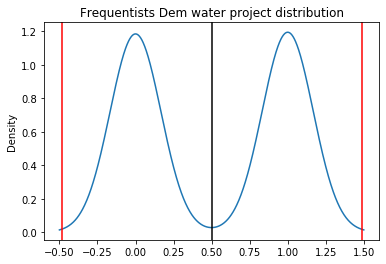

In [21]:
import matplotlib.pyplot as plt


CI = confidence_interval(water_project)

dem['water-project'].plot.density()
plt.title('Frequentists Dem water project distribution')
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red');

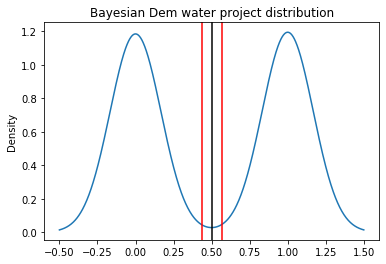

In [41]:
import matplotlib.pyplot as plt



dem['water-project'].plot.density()
plt.title('Bayesian Dem water project distribution')
plt.axvline(x=CI2[1][0], color='red')
plt.axvline(x=CI2[0], color='black')
plt.axvline(x=CI2[1][1], color='red');

Bayesian statistics is informed from each further piece of information where the frequentist approach relies on more sample sizes for increased accuracy.

---



## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!